### ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏÑú Í∑∏ÎûòÌîÑÎ•º ÏôÑÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Model Scores:
Linear Regression: Train R¬≤ = 0.5510, Test R¬≤ = 0.6321
Polynomial Regression: Train R¬≤ = 0.9346, Test R¬≤ = 0.9275


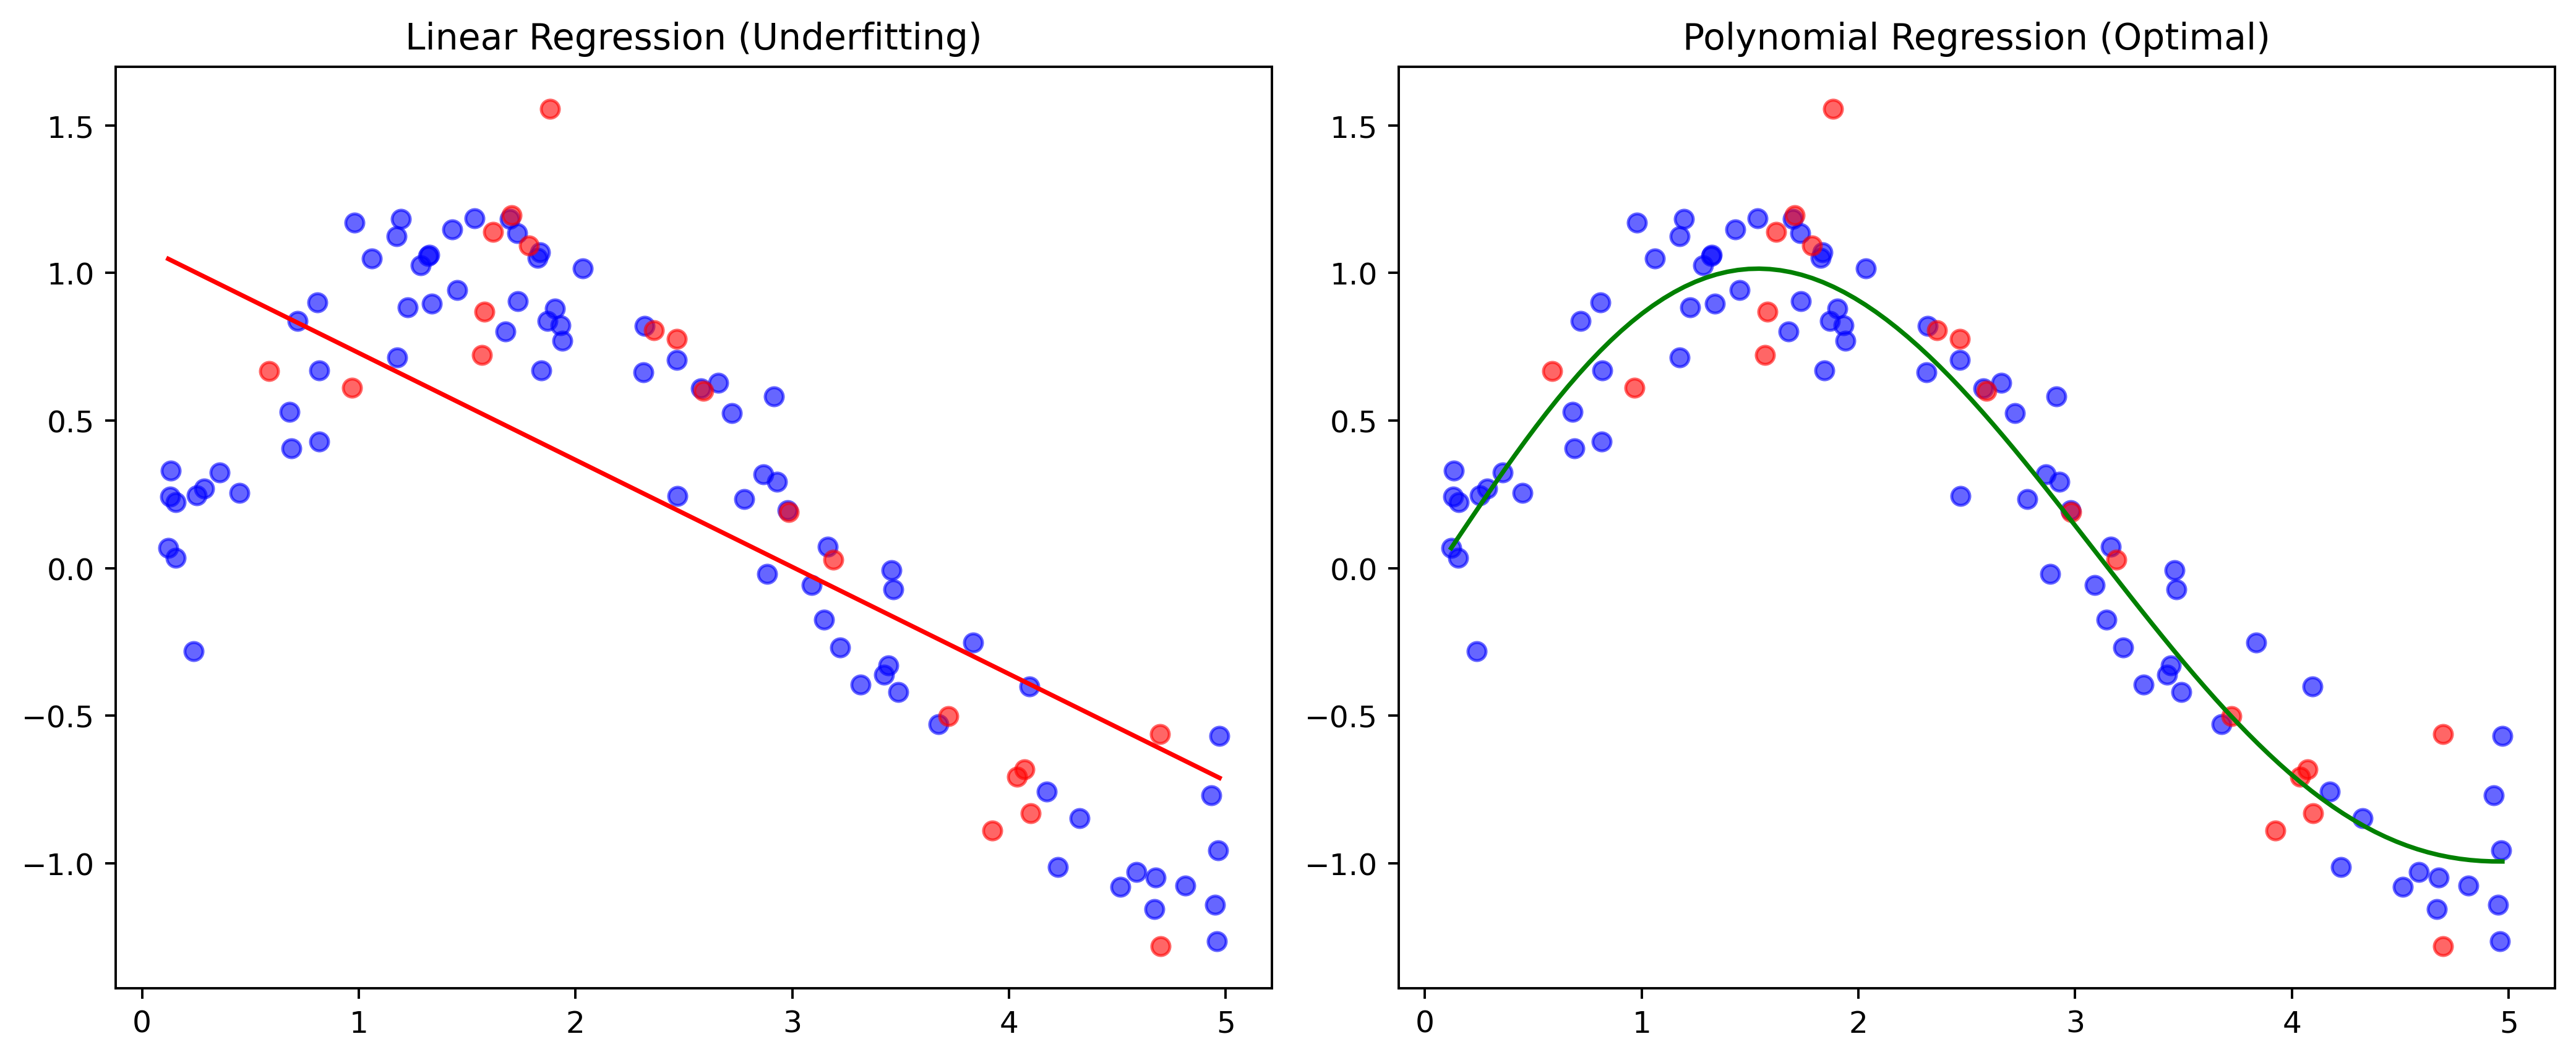

In [3]:
# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
np.random.seed(30)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + 0.2 * np.random.randn(100)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)

# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Îã§Ìï≠ ÌöåÍ∑Ä Î™®Îç∏
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Î™®Îç∏ Ï†êÏàò Ï∂úÎ†•
print("Model Scores:")
print(f"Linear Regression: Train R¬≤ = {linear_reg.score(X_train, y_train):.4f}, Test R¬≤ = {r2_score(y_test, linear_reg.predict(X_test)):.4f}")
print(f"Polynomial Regression: Train R¬≤ = {poly_reg.score(X_train_poly, y_train):.4f}, Test R¬≤ = {r2_score(y_test, poly_reg.predict(X_test_poly)):.4f}")

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=350)
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

# ÏÑ†Ìòï ÌöåÍ∑Ä Í∑∏ÎûòÌîÑ
axes[0].scatter(X_train, y_train, color='blue', alpha=0.6)
axes[0].scatter(X_test, y_test, color='red', alpha=0.6)
axes[0].plot(X_range, linear_reg.predict(X_range), color='red')
axes[0].set_title("Linear Regression (Underfitting)")

# Îã§Ìï≠ ÌöåÍ∑Ä Í∑∏ÎûòÌîÑ
axes[1].scatter(X_train, y_train, color='blue', alpha=0.6)
axes[1].scatter(X_test, y_test, color='red', alpha=0.6)
axes[1].plot(X_range, poly_reg.predict(X_range_poly), color='green')
axes[1].set_title("Polynomial Regression (Optimal)")
plt.tight_layout()
plt.show()

Polynomial Regression: Train R¬≤ = 0.9393, Test R¬≤ = 0.3196
Ridge Regression: Train R¬≤ = 0.8947, Test R¬≤ = 0.6201
Lasso Regression: Train R¬≤ = 0.7491, Test R¬≤ = 0.5557


C:\Users\gimse\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+00, tolerance: 1.027e-03
  model = cd_fast.enet_coordinate_descent(


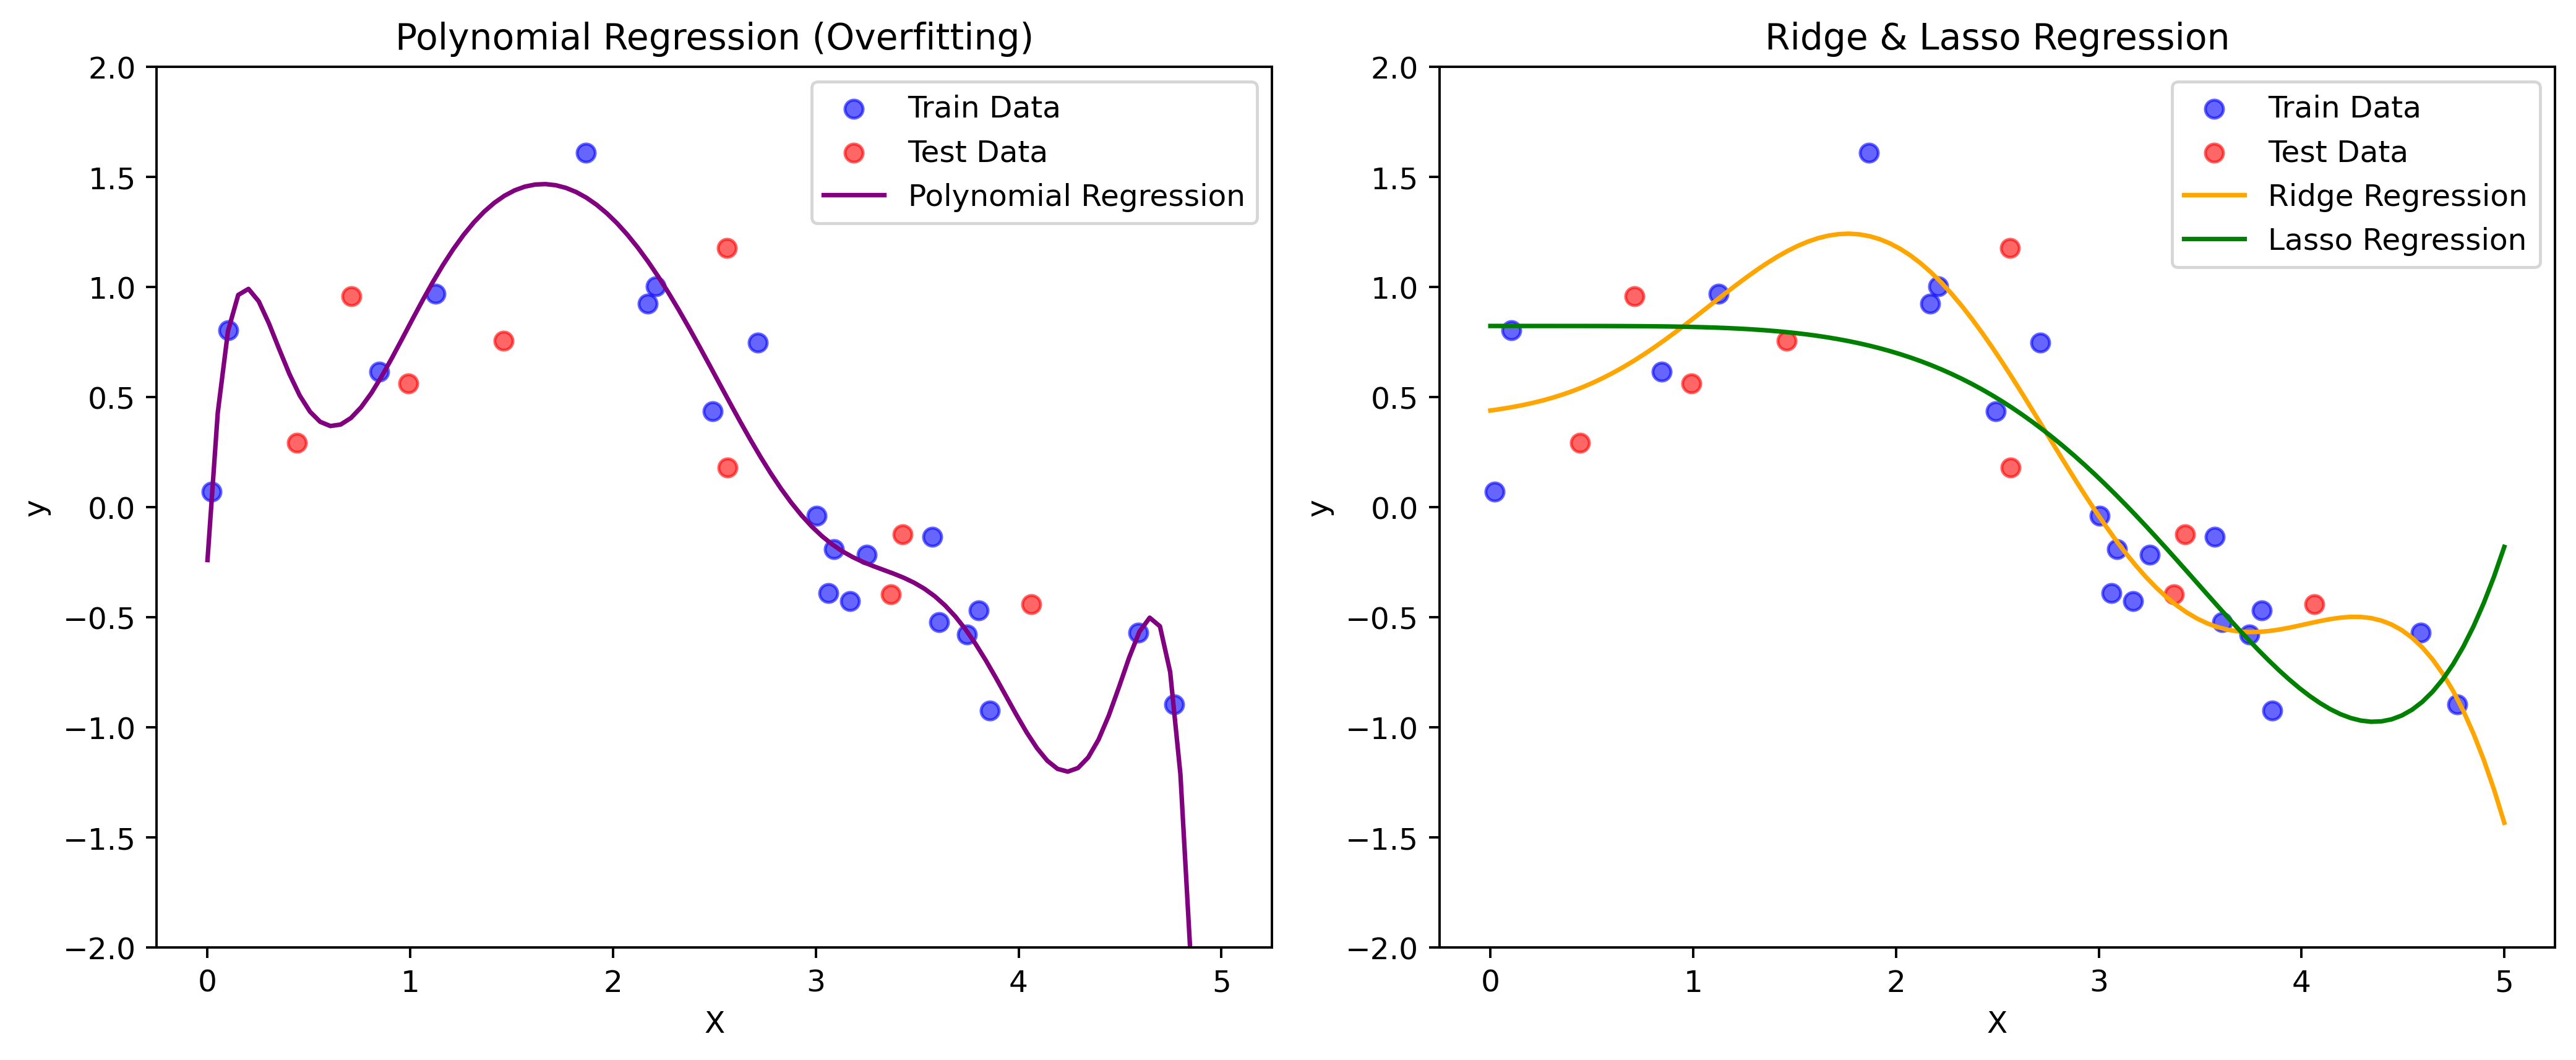

In [4]:
# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
np.random.seed(10)
X = np.sort(5 * np.random.rand(30, 1), axis=0)
y = np.sin(X).ravel() + 0.5 * np.random.randn(30)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Îã§Ìï≠Ïãù Î≥ÄÌôò
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
models = {
    "Polynomial Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0)
}

for name, model in models.items():
    model.fit(X_train_poly, y_train)
    print(f"{name}: Train R¬≤ = {model.score(X_train_poly, y_train):.4f}, Test R¬≤ = {model.score(X_test_poly, y_test):.4f}")

# ÏÉàÎ°úÏö¥ X Î≤îÏúÑ ÏÉùÏÑ±
X_range = np.linspace(0, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

# ÏòàÏ∏°Í∞í ÏÉùÏÑ±
y_pred_poly = models["Polynomial Regression"].predict(X_range_poly)
y_pred_ridge = models["Ridge Regression"].predict(X_range_poly)
y_pred_lasso = models["Lasso Regression"].predict(X_range_poly)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=350)

# Îã§Ìï≠ ÌöåÍ∑Ä Í∑∏ÎûòÌîÑ
axes[0].scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.6)
axes[0].scatter(X_test, y_test, color='red', label='Test Data', alpha=0.6)
axes[0].plot(X_range, y_pred_poly, color='purple', label='Polynomial Regression')
axes[0].set_title("Polynomial Regression (Overfitting)")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].set_ylim([-2, 2])

# Î¶øÏßÄ & ÎùºÏèò ÌöåÍ∑Ä Í∑∏ÎûòÌîÑ
axes[1].scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.6)
axes[1].scatter(X_test, y_test, color='red', label='Test Data', alpha=0.6)
axes[1].plot(X_range, y_pred_ridge, color='orange', label='Ridge Regression')
axes[1].plot(X_range, y_pred_lasso, color='green', label='Lasso Regression')
axes[1].set_title("Ridge & Lasso Regression")
axes[1].set_xlabel("X")
axes[1].set_ylabel("y")
axes[1].legend()
axes[1].set_ylim([-2, 2])

plt.tight_layout()
plt.show()


### Ïú†Î∞©Ïïî ÏßÑÎã® Ïù¥ÏßÑ Î∂ÑÎ•ò Í≥ºÏ†ú
Ïú†Î∞©Ïïî Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌôúÏö©ÌïòÏó¨ Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥†
Accuracy, Precision, Recall, F1 ScoreÎ•º ÏÇ¨Ïö©Ìï¥ ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌïòÏÑ∏Ïöî.

Îã§Ïùå 4Í∞ÄÏßÄ Î∂ÑÎ•ò ÏïåÍ≥†Î¶¨Ï¶ò Ï§ë ÏµúÏÜå 2Í∞ú Ïù¥ÏÉÅÏùÑ ÏÑ†ÌÉùÌïòÏó¨ Ïã§Ïäµ ÌõÑ Î∂ÑÎ•ò ÏßÄÌëú 4Í∞úÎ•º ÏÑ†ÌÉùÌïòÏó¨ Ï∂úÎ†•ÌïòÏÑ∏Ïöî

	1.	Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (Logistic Regression)
	2.	K-ÏµúÍ∑ºÏ†ë Ïù¥ÏõÉ (K-Nearest Neighbors, KNN)
	3.	ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ (Random Forest)

Í∞Å Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÏóê ÎåÄÌï¥ Îã§Ïùå ÏßÄÌëúÎì§ÏùÑ Ï∂úÎ†•ÌïòÍ≥† ÎπÑÍµêÌïòÏÑ∏Ïöî:

	1.	Ï†ïÌôïÎèÑ (Accuracy)
	2.	Ï†ïÎ∞ÄÎèÑ (Precision)
	3.	Ïû¨ÌòÑÏú® (Recall)
	4.	F1 Score


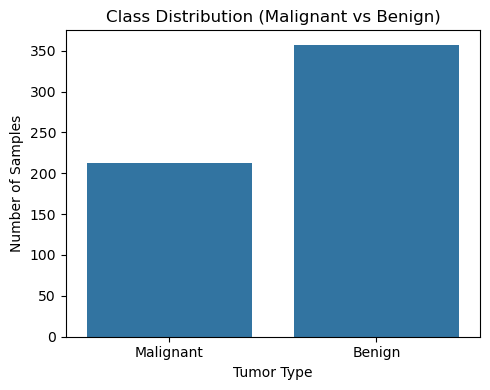

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í≥† DataFrameÏúºÎ°ú Î≥ÄÌôò
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

# ÌÅ¥ÎûòÏä§(Ï¢ÖÏñë Ïú†Ìòï) Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(5, 4))
sns.countplot(x='target', data=df)
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title("Class Distribution (Malignant vs Benign)")
plt.xlabel("Tumor Type")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # ÎπàÏπ∏1

# 3. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Î™®Îç∏ Ï†ïÏùò (2Í∞úÎßå ÏÑ†ÌÉùÌïòÏó¨ Ï£ºÏÑù Ìï¥Ï†úÌïòÍ≥† ÎπàÏπ∏ Ï±ÑÏö∞Í∏∞)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),       # ÎπàÏπ∏2
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)       # ÎπàÏπ∏3
    # "Random Forest": RandomForestClassifier(_______=100)           # ÎπàÏπ∏4
}

# 5. Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"üìå Model: {name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print("-" * 30)

üìå Model: Logistic Regression
Accuracy : 0.9737
Precision: 0.9722
Recall   : 0.9859
F1 Score : 0.9790
------------------------------
üìå Model: K-Nearest Neighbors
Accuracy : 0.9474
Precision: 0.9577
Recall   : 0.9577
F1 Score : 0.9577
------------------------------
